# Polyhedral Representation

将一个命令式语言的statement作为identifer, 加上loop的约束, 将其转化为Union Set 

| Imperative Program | | Iteration Domain |
|-|-|-|
| <pre><code class="c language-c">const int N = 100; <br>double X[N], Y[N], Z[2*N]; <br>  for (int i = 0; i &lt;= 2*N; ++i) <br>S:  Z[i] = 0.; <br>    for (int i = 0; i &lt;= N; ++i) <br>      for (int j = 0; j &lt;= N; ++j) <br>T:      Z[i + j] += A[i] * B[j]; <br> </code></pre> | $ \to $ | $( \{ T[i,j] \mid 0 < i \le j < 10; S[i,0] \mid 0 < i \le 20 \})$  |


## Statement instances

考虑以下计算多项式乘积的代码片段
每个多项式都由其系数数组表示

```c
const int N = 100;
double X[N], Y[N], Z[2*N];

for (int i = 0; i <= 2*N; ++i)
S:  Z[i] = 0.;
for (int i = 0; i <= N; ++i)
    for (int j = 0; j <= N; ++j)
T:      Z[i + j] += A[i] * B[j];
```

为其中一些statement添加label作为identifier.

Statement `S` 初始化数组`Z`的元素,statement `T`计算它们.
Statement `S` 被包含在循环中,他将会按以下顺序被执行 $((2\mathtt{N} + 1))$ 次:

* `Z[0] = 0.; /* i = 0 */`
* `Z[1] = 0.; /* i = 1 */`
* ...
* `Z[2*N] = 0. /* i = 2*N */;`

把循环中每个单独执行的statement称为 **statement instances**
这样每个instance可以通过语句label和封闭循环迭代器的值来标识, 例如：

* $(\mathtt{S}(0))$
* $(\mathtt{S}(1))$
* ...
* $(\mathtt{S}(2 \mathtt{N}))$

如果一个statement包含在多个循环中，其instance由所有迭代器的值按循环的顺序来标识, 比如statement `T` 会包含以下这些例子:

* $(\mathtt{T}(0,0))$ for `Z[0] += A[0] * B[0] /* i = 0, j = 0 */`,
* $(\mathtt{T}(0,1))$ for `Z[1] += A[0] * B[1] /* i = 0, j = 1 */`,
* ...
* $(\mathtt{T}(\mathtt{N},\mathtt{N}))$ for `Z[2*N] += A[N] * B[N] /* i = N, j = N */`.

## Iteration domain

一个statement的所有instance的集合被称为 *(iteration) domain*.
<!-- The set of all instances of a statement is referred to as *(iteration) domain* of a statement. -->

<!-- Iteration domains can be expressed using the set-builder notation. -->
迭代域可以使用 set-builder 表示法来表示:

比如, $( \mathcal{D}_\mathtt{S} = \{ \mathtt{S}[i] : 0 \leq i \leq \mathtt{N} \}. )$
表达式 $( 0 \leq i \leq \mathtt{N} )$ 被循环起始(`i=0`)到结束(`i<=N`)所约束.
<!-- The loop iterates for $(i)$ ranging from 0 to $(\mathtt{N})$ inclusive. -->

<!-- The set we defined is *named*, i.e. the statement name $( \mathtt{S} )$ is mentioned before the list of loop iterator names. -->

<!-- Note that $( \mathtt{N} )$ here is treated as a symbolic constant. -->
注意, 这里 $( \mathtt{N} )$ 被看作是符号常量. 在多面体模型中,这些符号常量通常被称为 *(structure) parameters*:
<!-- In the context of the polyhedal model, such symbolic constants are referred to as *(structure) parameters*.
Parameters are explicitly mentioned in the set description, -->
$( \mathcal{D}\_\mathtt{S} = [N] \rightarrow \{ \mathtt{S}[i] : 0 \leq i \leq N \} )$,
本质上是将其转换为从参数值到domain set的具体instance的映射。
这样的参数集可以在 *isl* 中如下定义:
<!-- essentially turning it into a map from the parameter value to a concrete instance of a domain set.
Such parametric sets can be defined in *isl* as follows. -->


In [43]:
import islpy as isl
D_S = isl.Set("[N] -> {S[i] : 0 <= i <= N}")
print(D_S)

[N] -> { S[i] : 0 <= i <= N }


 
<!-- Similarly, we can define the iteration domain of the statement `T`, -->
同样, 我们可以为statement `T`定义iteration domain,
$( \mathcal{D}_\mathcal{T} = [N] \rightarrow \{ \mathtt{T}(i,j) : 0 \leq i,j \leq N \} )$.

<!-- This domain is defined as a set of two-dimensional vectors.
Each component of a vector corresponds to an enclosing loop, in nesting order. -->
这个domain被定义为一组二维向量, 向量的每个分量都以嵌套顺序对应于一个封闭循环。

### Question

<!-- Define the variable `D_T` so that it contains the iteration domain of `T` using *isl* notation, then print it. -->
使用 *isl* 表示定义变量 `D_T` 使其包含 `T` 的迭代域，然后打印它。

In [44]:
D_T = isl.Set("[N] -> { T[i,j] : 0 <= i, j <= N }")
print(D_T)

[N] -> { T[i, j] : 0 <= i <= N and 0 <= j <= N }



<!-- As you may see, *isl* output uses conjunction (logical *and*) to combine inequalities around different iterators.
This can be handy if the loop bounds differ.  Use `and` in *isl* syntax to express conjunction. -->
如上所示，*isl* 输出使用连词(logical *and*)来组合不同迭代器周围的不等式,
这可以很方便循环边界不同的情况.

### Question
使用 `and` operator 分离 `i` 和 `j`的bounds来重新定义`D_T` .

In [45]:
D_T = isl.Set(" [N] -> { T[i, j] : 0 <= i <= N and 0 <= j <= N }")
print(D_T)

[N] -> { T[i, j] : 0 <= i <= N and 0 <= j <= N }


<!-- 
Note that the output does not necessarily reproduce the textual form of the input.
Rather, it represents the same set after simplification.
In particular, redundant inequalities are eliminated and components that appear in first positions are expressed using simpler equations.
Here is an example of the simplification result. -->

注意，print的输出不一定再现输入的文本形式
相反，它表示简化后的同一集合, 比如消除了多余的不等式，并使用更简单的方程来表示出现在第一位的分量。
比如下面这个例子:

In [46]:
print(isl.Set("{[i,j]: i+j >= 0 and i >= 0 and j > 0 and j >= 1}"))

{ [i, j] : i >= 0 and j > 0 and j >= -i }


## Handling Non-Unit Strides

<!-- Consider now the following code snippet that negates every odd element in the array. -->
考虑以下代码片段，它取数组中的每个奇数元素的负数。
```c
const int N;
double A[2*N];

for (int i = 1; i < 2*N; i += 2)
R:  A[i] = -A[i];
```

如果数组`A`存储的是复数的实部和虚部，那么上面的代码操作计算复共轭.

`R` 的迭代域现在应该限制为 `i` 的奇数值, 这可以使用模运算符来实现: 
<!-- If `A` stores real and imaginary parts of complex numbers, one after other, this operation computes a complex conjugate.

The iteration domain of `R` should now be restricted to odd values of `i`.
This can be achieved using a modulo operator -->
$( \mathcal{D}_\mathtt{R}: [N] \rightarrow \{ [i] : 0 \leq i < N \wedge i\mod 2 = 1 \} $)
<!-- which can be translated directly into *isl* syntax. -->

In [47]:
D_R = isl.Set("[N] -> {R[i]: (i mod 2) = 1 and 0 <= i < N}")
print(D_R)

[N] -> { R[i] : (1 + i) mod 2 = 0 and 0 <= i < N }



<!-- As you may see, *isl* transforms the modulo operation into division with floor rounding.
This transformation is a combination of two properties of the modulo operation -->
*isl* 将模运算转换为带底舍入的除法, 这种转换是模运算的两个属性的组合

$( a \mod b = c \Leftrightarrow (a + c) \mod b = 0 )$,

$( a \mod b \equiv a - b \lfloor a/b \rfloor )$.



### Question
<!-- Define the set representing the iteration domain of `Q` in the following code, then print it -->
在下面的代码中定义代表`Q`的迭代域的集合，然后打印出来
```c
const int N;
double A[2*N];

for (int i = 1; i < 2*N; i += 2)
Q:  A[i] = -A[i];
```


In [48]:
D_Q = isl.Set("[N] -> {Q[i]: (i mod 2) = 1 and 0 <= i < N}")
print(D_Q)

[N] -> { Q[i] : (1 + i) mod 2 = 0 and 0 <= i < N }


## Handling Conditions

<!-- Conditional constructs inside the loop also limit the iteration domain of the statements they enclose.
The complex conjugate computation can also be re-written using a branch inside the unit-stride loop. -->
循环内的条件构造也限制了它们所包含的语句的迭代域,
复共轭计算也可以使用单位步长循环内的分支语句来重写。
```c
const int N;
double A[2*N];

for (int i = 1; i < 2*N; ++i)
    if (i % 2 == 1)
P:    A[i] = -A[i];
```
<!-- The definition of the iteration domain should also include the constraint imposed by the branches surrounding the statement. -->
迭代域的定义还应该包括语句周围的分支所施加的约束。

### Question
<!-- Define the set representing the iteration domain of `P` and print it. -->
定义代表`P`的迭代域的集合并打印它。



In [49]:
D_P = isl.Set("[N] -> {P[i]: (i mod 2) = 1 and 0 <= i < N}")
print(D_P)

[N] -> { P[i] : (1 + i) mod 2 = 0 and 0 <= i < N }



<!-- Even though the set of statement instances are identical for `P` and `R`, these domains would be considered different *because of different statement names*. -->
即使 `P` 和 `R` 的语句实例集是相同的，这些域也会被认为是不同的因为是不同的*statement name*。

### Question
如何修改`D_P`, 让他等价于`D_R`?
<!-- What do you need to change in the definition of `D_P` to make it equal to `D_R`? 
Change it and check using `D_P.is_equal(D_R)`. -->


In [50]:
D_P = isl.Set("[N] -> {R[i]: i mod 2 = 1 and 0 <= i < N}")
print(D_P.is_equal(D_R))

True


## Iteration Domains as Presburger Sets

<!-- Because *isl* operates on Presburger Sets, it can encode any iteration domain that can be expressed using Presburger formulas.
This typically involves the statements surrounded by loops and branches with the so called *static control flow*.
That is, loop bounds and branch conditions are Presburger formulas of outer loop bounds and parameters.
The values of parameters are unknown but must be constant throughout the execution.
As a corollary, the control flow cannot depend on *values* being computed.
Hence the program parts amenable to the polyhedral modeling are referred to as *static control parts* or *SCoPs*. -->

由于*isl*在Presburger Sets上运行，因此它可以编码任何可以使用Presburger公式表示的迭代域,
这通常涉及由具有所谓的*static control flow*的循环和分支包围的语句。

也就是说，loop bounds和分支条件是外部边界和参数的Presburger公式,
其中参数的值未知，但在整个执行过程中必须保持不变。

作为推论，控制流不能依赖于被计算的*value*, 
因此，适合多面体建模的程序部件被称为*static control parts*或*SCoPs*。

### Question

<!-- Define the iteration domain of the only statement, enclosed in two loops and a branch with a disjunctive constraint.

Hint: use the operator `or` and parentheses to ensure the precedence if necessary. -->
定义包含在两个循环和一个具有析取约束的分支中的statement的迭代域。

Hint: 如果有必要，请使用运算符`or`和括号来确保优先级
```c
for (int i = 0; i < 10; ++i)
  for (int j = 0; j < 10; ++j)
    if (i < j - 1 || i > j + 1)
      Z[i][j] = 0.;
```

In [51]:
D_Z = isl.Set(" { Z[i,j] : 0 <= i,j < 10 and (i < j - 1 or i > j + 1) } ")
print(D_Z)

{ Z[i, j] : (i >= 0 and 2 + i <= j <= 9) or (i <= 9 and 0 <= j <= -2 + i) }


### 
<!-- It is also possible to express certain common mathematical operations using the Presburger formulas -->
也可以使用Presburger公式表达某些常见的数学运算:

* `i >= max(a,b)` $( \Leftrightarrow i \geq a \wedge i \geq b )$ (lower bound only)
* `i <= min(a,b)` $( \Leftrightarrow i \leq a \wedge i \leq b )$ (upper bound only)
* `a = ceil(b/c)` $( \Leftrightarrow a = \lfloor (b - 1)/c \rfloor + 1 )$



## Putting Domains Together
<!-- In summary, an iteration domain of a statement is a set of multidimensional vectors constrained by the affine expressions that appear in loop bounds and branch conditions surrounding the statement.

Iteration domains of multiple statements live in different *spaces* due to different statement names, even if they are enclosed by the same loops.
They can be managed together by putting them into a union set.  For example, the combined domain of -->

总之，statement的迭代域是一组受仿射表达式约束的多维向量，仿射表达式出现在statement周围的循环边界和分支条件下。

由于statement名称不同，多个语句的迭代域存在于不同的*Spaces*中，即使它们被相同的循环包围,
通过将它们放入*Union set*中可以统一操作, 比如组合domain:
```c
for (int i = 0; i < 10; ++i)
  for (int j = 0; j < 10; ++j) {
    if (i < j - 1)
S1:   Z[i][j] = 0.;
    if (i > j + 1)
S2:   Z[i][j] = 0.;
  }
```
<!-- is defined as -->
被定义为:
$( \mathcal{D} = 
    \{\mathtt{S1}[i,j]: 0 \leq i,j < 10 \wedge i < j - 1 \} \cup 
    \{\mathtt{S2}[i,j]: 0 \leq i,j < 10 \wedge i > j + 1 \},
$)
<!-- which translates to *isl* notation as -->
*isl*表示如下:


In [52]:
D = isl.UnionSet("{S1[i,j]: 0 <= i,j <= 10 and i < j - 1; S2[i,j]: 0 <= i,j <= 10 and i > j + 1}")
print(D)

{ S2[i, j] : 0 <= i <= 10 and 0 <= j <= 10 and j <= -2 + i; S1[i, j] : 0 <= i <= 10 and j >= 2 + i and 0 <= j <= 10 }


## Plotting Iteration Domains
可以绘制1D/2D的非参数迭代域集合:
<!-- Polyhedral playground supports 1D and 2D plots of non-parametric sets. -->
<!-- If the iteration domain has these properties, you can plot it immediately using -->


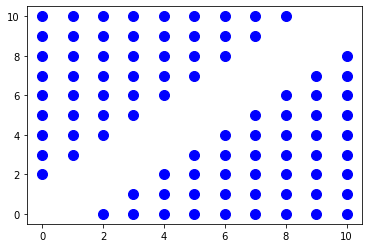

In [53]:
from islplot.plotter import *
plot_set_points(D,color='blue')


<!-- visualizations can be useful to see the size of the domain or whether individual domains intersect. -->
可视化可以有效的检查domain的size或者独立的domain交集.
<!-- In this example, domains are completely disjoint, which means they can be traversed by separate loop nests. -->
这里例子中,domain完全不相交,意味他们可以被分离的循环所穿过.

<!-- If the domain is parametric, you will have to first *fix* all parameter values to a constant by -->
如果domain是参数化的,我们首先需要*fix*所有的参数到constant, 通过以下几种方法:

* 创建一个参数集，其中域值是固定的;
* 将domain与这个新set相交;
* 映射所有参数.

<!-- Here is how it can be done for `T` statement of our first example. -->
下面是对第一个例子的`T` statement 的操作方法:

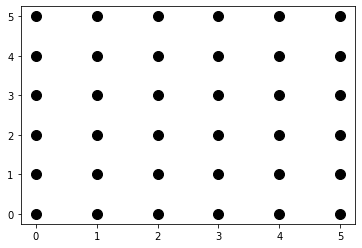

In [54]:
fixer = isl.Set("[N] -> {T[i,j]: N = 5}")
D_T = D_T.intersect(fixer)
D_T = D_T.project_out(isl.dim_type.param, 0, 1)
plot_set_points(D_T)


<!-- The `isl.dim_type.param` means that you want to project out parameters, the two following numbers are the
position of the first parameter and the number of consecutive parameters that will be projected out.
For the sake of plotting, project out all of them. Note that if you forget to fix the parameter size, the set will become unbounded and cannot be plotted. -->
`isl.dim_type.param`表示你想映射的参数，后面两个数据分别是第一个参数的位置和将要映射的连续参数的数量.

为了plot出来，因此把所有维度都映射出来。注意，如果忘记*fix*参数大小，该集将变得unbounds，无法plot. 

<!-- Similarly to parameters, you can project out domain dimensions until you get at most two before plotting.
Use `isl.dim_type.set` to get those. -->
与参数类似，在plot之前可以投影domain dimensions获得两个维度.
使用'isl.dim_type.set'来获取这些

### Question
<!-- In the following loop nest performing LU decomposition, -->
下面执行LU分解的代码:

```c
for (i = 0; i < N; i++) {
  for (j = 0; j < i; j++) {
    for (k = 0; k < j; k++) {
Sa:    A[i][j] -= A[i][k] * A[k][j];
    }
Sb: A[i][j] /= A[j][j];
  }
  for (j = i; j < N; j++) {
    for (k = 0; k < i; k++) {
Sc:   A[i][j] -= A[i][k] * A[k][j];
    }
  }
}
```

<!-- 1. Define the union set with all iteration domains.
1. Check if iteration domains of `Sa` and `Sc` overlap.
1. Plot projections on the domain on (i,j), (j,k). -->
1.  为所有的iteration domain定义union set.
2.  检查iteration domain `Sa` 和 `Sc` 是否有overlap
3.  绘制domain在(i,j)和(j,k)

<!-- Hint: it is impossible to project out domain dimensions *directly* from the union set
because it may have sets that live in different spaces.
However, a union set may be constructed from sets, and you can take a union of union sets. -->
Hint: 不能*直接*从union set中映射出domain dimension,因为他们可能存在不同的space中, 但是可以从set中做union得到他.


In [55]:
D_Sa = isl.Set("[N] -> { Sa[i,j,k] :0 <= k < j < i < N }")
D_Sb = isl.Set("[N] -> { Sb[i,j] :0 <= j < i < N }")
D_Sc = isl.Set("[N] -> { Sc[i,j,k] :0 <= k < i <= j < N }")
D = isl.UnionSet(D_Sa).union(D_Sb).union(D_Sc)
print(D)

[N] -> { Sc[i, j, k] : i <= j < N and 0 <= k < i; Sa[i, j, k] : i < N and j < i and 0 <= k < j; Sb[i, j] : i < N and 0 <= j < i }


In [56]:
# NOTE 这里需要去掉标识名再做交集.
D_Sa_ = isl.Set("[N] -> { [i,j,k] :0 <= k < j < i < N }")
D_Sc_ = isl.Set("[N] -> { [i,j,k] :0 <= k < i <= j < N }")
D_Sa_.intersect(D_Sc_).is_empty()

True

In [58]:
D_Sa = D_Sa.intersect(isl.Set("[N] -> { Sa[i,j,k]: N = 8}"))
D_Sb = D_Sb.intersect(isl.Set("[N] -> { Sb[i,j]: N = 8}"))
D_Sc = D_Sc.intersect(isl.Set("[N] -> { Sc[i,j,k]: N = 8}"))
D_Sa = D_Sa.project_out(isl.dim_type.param, 0, 1)
D_Sb = D_Sb.project_out(isl.dim_type.param, 0, 1)
D_Sc = D_Sc.project_out(isl.dim_type.param, 0, 1)

{ [i, j] : (i <= 7 and 0 < j < i) or (i > 0 and i <= j <= 7); Sb[i, j] : i <= 7 and 0 <= j < i }


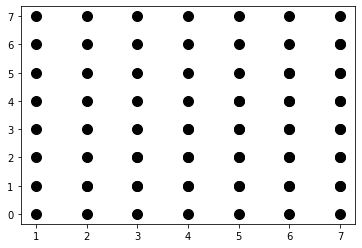

In [68]:
D_Sa_ = D_Sa.project_out(isl.dim_type.set, 2, 1)
D_Sc_ = D_Sc.project_out(isl.dim_type.set, 2, 1)
D_ij = isl.UnionSet(D_Sa_).union(D_Sb).union(D_Sc_)
print(D_ij)
plot_set_points(D_ij)

{ [j, k] : j <= 7 and 0 <= k < j }


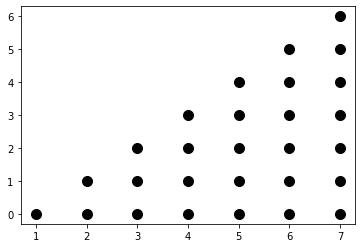

In [71]:
D_Sa_ = D_Sa.project_out(isl.dim_type.set, 0, 1)
D_Sc_ = D_Sc.project_out(isl.dim_type.set, 0, 1)
D_jk = isl.UnionSet(D_Sa_).union(D_Sc_)
print(D_jk)
plot_set_points(D_jk)